In [240]:
import folium
mymap = folium.Map(location=[37.773972, -122.431297], zoom_start=12)


In [241]:
folium.Marker([37.773972, -122.431297], popup="San Francisco").add_to(mymap)

In [242]:
folium.Marker([37.784972, -122.401297], popup="Another Location").add_to(mymap)
mymap

##### Plotting a Circle Marker with Radius

In [243]:

mymap1 = folium.Map(location=[37.773972, -122.431297], zoom_start=11, control_scale=True)

In [244]:
folium.CircleMarker(location=[37.773972, -122.431297], radius=50,  # radius in pixels
                    color="blue", fill=True, fill_color="blue", fill_opacity=0.5,
                    popup="San Francisco Circle").add_to(mymap1)

In [245]:
# display the map 
mymap1

Plotting Polylines and Polygon

In [246]:
import folium

# Create a map centered at a specific location
mymapp = folium.Map(location=[37.773972, -122.431297], zoom_start=12)

# Define coordinates for the polyline (e.g., path or line)
coordinates = [
    [37.773972, -122.431297],
    [37.783972, -122.421297],
    [37.793972, -122.411297]
]


In [247]:
folium.PolyLine(
    coordinates,
    color="green",
    weight=5,
    opacity=0.7,
).add_to(mymapp)

In [248]:
mymapp

In [249]:
polygon_coordinates = [
    [37.773972, -122.432297],
    [37.783972, -122.422297],
    [37.793972, -122.412297],
    [37.773973, -122.432298],
    [37.773974, -122.431298],
]

In [250]:
folium.Polygon(
    coordinates,
    color="red",
    fill=True,
    fill_opacity=0.3,
).add_to(mymapp)

In [251]:
mymapp

### Heatmapwith folium

In [252]:
import folium
from folium.plugins import HeatMap


In [253]:
# list of lat, long points
heat_data = [
    [37.773972, -122.431297],  # Point 1
    [37.784972, -122.401297],  # Point 2
    [37.793972, -122.411297],  # Point 3
    [37.753972, -122.421297]   # Point 4
]

In [254]:
mymap = folium.Map(location=[37.773972, -122.431297], zoom_start=11)

In [255]:
HeatMap(heat_data).add_to(mymapp)
mymapp

In [256]:
mymap.save('interactive_map.html')

In [257]:
import pandas as pd 
df = pd.read_csv('C:/Users/Learner/Desktop/-111daysofCFCchallenge/data/schools.csv')
#- use forward shlash

df.head(2)

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"


In [258]:
coordinates_list = df[['Latitude','Longitude']].values.tolist()

In [259]:
mymaph1 = folium.Map(location=[36.252961, -86.832229], zoom_start=12) # replace the coordinates with the state or region coordinates

In [260]:
# Add HeatMap
HeatMap(heat_data).add_to(mymaph1)
# Display the map
mymaph1

In [261]:
# Save map to HTML
mymaph1.save('interactive_map_for_schools_in_usa.html')

In [262]:
import geopandas as gpd 
import matplotlib.pyplot as plt

In [263]:
# Load a shapefile data
path = r"C:\Users\Learner\Desktop\-111daysofCFCchallenge\data\ServiceDistricts.shp"
# Reading a shapefile data
vector_data = gpd.read_file(path)

# View the first few rows of the data
print(vector_data.head())

                                            geometry
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...


In [264]:
print(vector_data.geometry.head())

0    POLYGON ((1766078.549 711757.27, 1766000.028 7...
1    MULTIPOLYGON (((1800630.485 619627.187, 180060...
Name: geometry, dtype: geometry


In [265]:
# Get the coordinate reference system (CRS)
print("CRS:", vector_data.crs)

CRS: None


In [266]:
print("Bounding Box:",vector_data.total_bounds)

Bounding Box: [1656681.00000001  595512.40000002 1816269.59999999  755221.60000001]


In [267]:
print("Missing values:",vector_data.isnull().sum())

Missing values: geometry    0
dtype: int64


In [268]:
print(vector_data.describe())

                                                 geometry
count                                                   2
unique                                                  2
top     POLYGON ((1766078.5487499982 711757.2704166621...
freq                                                    1


In [269]:
vector_data.iloc[1].describe()

count                                                     1
unique                                                    1
top       MULTIPOLYGON (((1800630.4848952293 619627.1869...
freq                                                      1
Name: 1, dtype: object

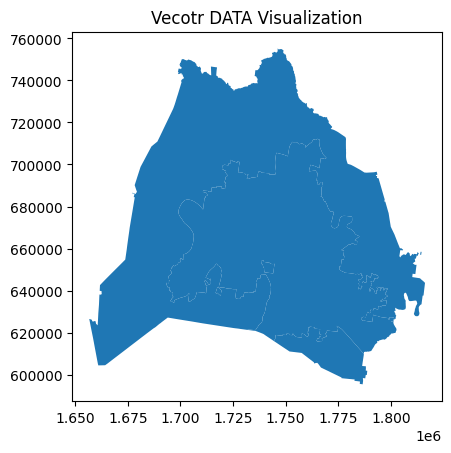

In [270]:
import matplotlib.pyplot as plt
vector_data.plot()
plt.title("Vecotr DATA Visualization")
plt.show()

In [271]:
vector_data.geom_type.value_counts()

Polygon         1
MultiPolygon    1
Name: count, dtype: int64

In [272]:
vector_data['area']=vector_data.geometry.area
print(vector_data['area'].head())

0    5.513380e+09
1    9.128327e+09
Name: area, dtype: float64


Working with Raster Data using rasterio


In [273]:
import rasterio
import numpy as np

In [274]:
# Open the raster file
raster_path = r'C:\Users\Learner\Desktop\-111daysofCFCchallenge\data\sample.tif'
# load raster data
src = rasterio.open(raster_path)

In [275]:
print("Raster Metadata:")
print(src.meta)

Raster Metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1001, 'height': 1001, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'), 'transform': Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0)}


In [276]:
print("No. of bands:",src.count)

No. of bands: 3


In [277]:
print("CRS:",src.crs)

CRS: EPSG:32631


In [278]:
print("Dimensions(wdth,ht)",src.width,src.height)

Dimensions(wdth,ht) 1001 1001


In [279]:
band1=src.read(1)

In [280]:
print("Datatype:",band1.dtype)

Datatype: uint16


In [281]:
print("no. of NaN values:", np.sum(np.isnan(band1)))

no. of NaN values: 0


In [282]:
# Check the range of pixel values
print("Pixel Value Range:", band1.min(),band1.max())

Pixel Value Range: 0 10964


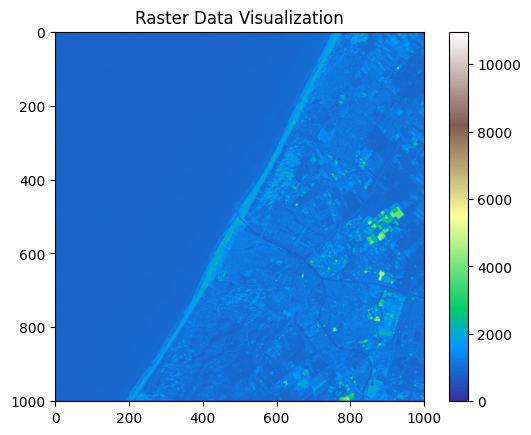

In [283]:
import matplotlib.pyplot as plt 
plt.imshow(band1,cmap='terrain')
plt.colorbar()
plt.title("Raster Data Visualization")
plt.show()

In [284]:
band1 = src.read(1)
band1 = src.read(2)
band1 = src.read(3)

Working with Geometries in Vector Data

In [285]:
# Inspect the geometry types (point, polygon, etc.)
print("Geometry Types:", vector_data.geometry.type.value_counts())

Geometry Types: Polygon         1
MultiPolygon    1
Name: count, dtype: int64


In [286]:
vector_data['area'] = vector_data.geometry.area
print("Area of few features:",vector_data['area'].head())

Area of few features: 0    5.513380e+09
1    9.128327e+09
Name: area, dtype: float64


In [287]:
print("bounds of features:")
vector_data.geometry.bounds

bounds of features:


,minx,miny,maxx,maxy
0,1.693307e+06,609996.670208,1.802701e+06,712203.400833
1,1.656681e+06,595512.400000,1.816270e+06,755221.600000


CRS (Coordinate Reference System) Inspection

In [288]:
print("Vector CRS:", vector_data.crs)

Vector CRS: None


In [289]:
print("Raster CRS:", src.crs)

Raster CRS: EPSG:32631


If the CRSs of two layers are different, you may need to reproject one layer to match the other before combining them.

In [290]:
import geopandas as gpd

# Load school district GeoJSON
vector_data = gpd.read_file('C:/Users/Learner/Desktop/-111daysofCFCchallenge/data/school-district.geojson')

# Check first few rows
print(vector_data.head())

# Basic metadata
print(vector_data.columns)


   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   
3        Anna  Hermitage  37076          anna.shepherd@mnps.org    TN   
4         Amy  Nashville  37221             amy.frogge@mnps.org    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San Marcos Drive      Member       2018        2   
3  Shepherd     4545 Raccoon Trail       Chair       2018        4   
4    Frogge  7237 Riverfront Drive      Member       2016        9   

          phone                                           geometry  
0  615-268-5269  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
1 

In [291]:
# If there's a population or area column
print("Summary Statistics:")
print(vector_data.describe())

# Example: Mean of a specific column
if 'population' in vector_data.columns:
    print("Mean Population:", vector_data['population'].mean())


Summary Statistics:
        first_name       city    zip                           email state  \
count            9          9      9                               9     9   
unique           9          4      9                               9     1   
top     Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
freq             1          6      1                               1     9   

       last_name          address position term_expir district         phone  \
count          9                9        9          9        9             9   
unique         9                9        3          2        9             9   
top       Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   
freq           1                1        7          5        1             1   

                                                 geometry  
count                                                   9  
unique                                                  9  
top     

In [292]:
# Bounding box area
bounds = vector_data.total_bounds  # [minx, miny, maxx, maxy]
bbox_area = (bounds[2] - bounds[0]) * (bounds[3] - bounds[1])

# Density = number of features / area
point_density = len(vector_data) / bbox_area
print(f"Feature Density: {point_density} per unit area")


Feature Density: 38.089736255191035 per unit area


In [293]:
# Distance from the first feature to all others
from shapely.geometry import Point

first_geom = vector_data.geometry.iloc[0]
distances = vector_data.distance(first_geom)

print("Distances from the first district to all others:")
print(distances)


C:\Users\Learner\AppData\Local\Temp\ipykernel_5964\3123235301.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = vector_data.distance(first_geom)


Distances from the first district to all others:
0    0.000000
1    0.000000
2    0.087241
3    0.044195
4    0.000000
5    0.007875
6    0.000000
7    0.105757
8    0.038833
dtype: float64


In [294]:
import rasterio
import numpy as np

with rasterio.open('C:/Users/Learner/Desktop/-111daysofCFCchallenge/data/sample.tif') as src:
    band = src.read(1)
    print("Raster Stats:")
    print("Mean:", np.mean(band))
    print("Min:", np.min(band))
    print("Max:", np.max(band))
    print("Std Dev:", np.std(band))


Raster Stats:
Mean: 1009.3248849053044
Min: 0
Max: 10964
Std Dev: 311.3070876735991


In [296]:
import rasterio
import numpy as np

with rasterio.open('C:/Users/Learner/Desktop/-111daysofCFCchallenge/data/sample.tif') as src:
    band = src.read(1)
    print("Raster Stats:")
    print("Mean:", np.mean(band))
    print("Min:", np.min(band))
    print("Max:", np.max(band))
    print("Std Dev:", np.std(band))


Raster Stats:
Mean: 1009.3248849053044
Min: 0
Max: 10964
Std Dev: 311.3070876735991
